# Further Exploratory Data Analysis on AVA Dataset

In [71]:
import altair as alt
import pandas as pd
from imageaesthetics import pipeline

In [72]:
alt.data_transformers.enable('csv')

DataTransformerRegistry.enable('csv')

In [73]:

DATA_FOLDER = "../data/"
IMAGE_PATH = "{}/ava_downloader/AVA_dataset/images".format(DATA_FOLDER)
META_DATA_PATH = "{}/ava_downloader/AVA_dataset/images_meta.csv".format(DATA_FOLDER)

df = pd.read_csv(META_DATA_PATH).drop(
    ['Unnamed: 0', 'rating.mean.bucket2'], axis=1)
df['num_rates'] = df.apply(lambda row: row['1'] + row['2'] + row['3'] + row['4'] +
                             row['5'] + row['6'] + row['7'] + row['8'] + row['9'] + row['10'], axis=1)
for i in range(1, 11):
    df['{}_pct'.format(i)] = df['{}'.format(i)]/df['num_rates']

In [74]:
melted = pd.melt(df[['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct','image.id', ]], id_vars=['image.id'], value_vars=['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct'])

In [75]:
# alt.Chart(melted).mark_bar().encode(
#   x=alt.X('value:Q', bin=alt.Bin(maxbins=80)),
#   y='count()'
# ).facet(row='variable').resolve_scale(x='independent')

In [76]:
train_df, validation_df, test_df = pipeline.split_data(META_DATA_PATH)

loaded 255508 rows


C:\Users\jensl\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2069: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [77]:
melted_train = pd.melt(train_df, id_vars=['image.id'], value_vars=['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct'])
melted_test = pd.melt(test_df, id_vars=['image.id'], value_vars=['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct'])

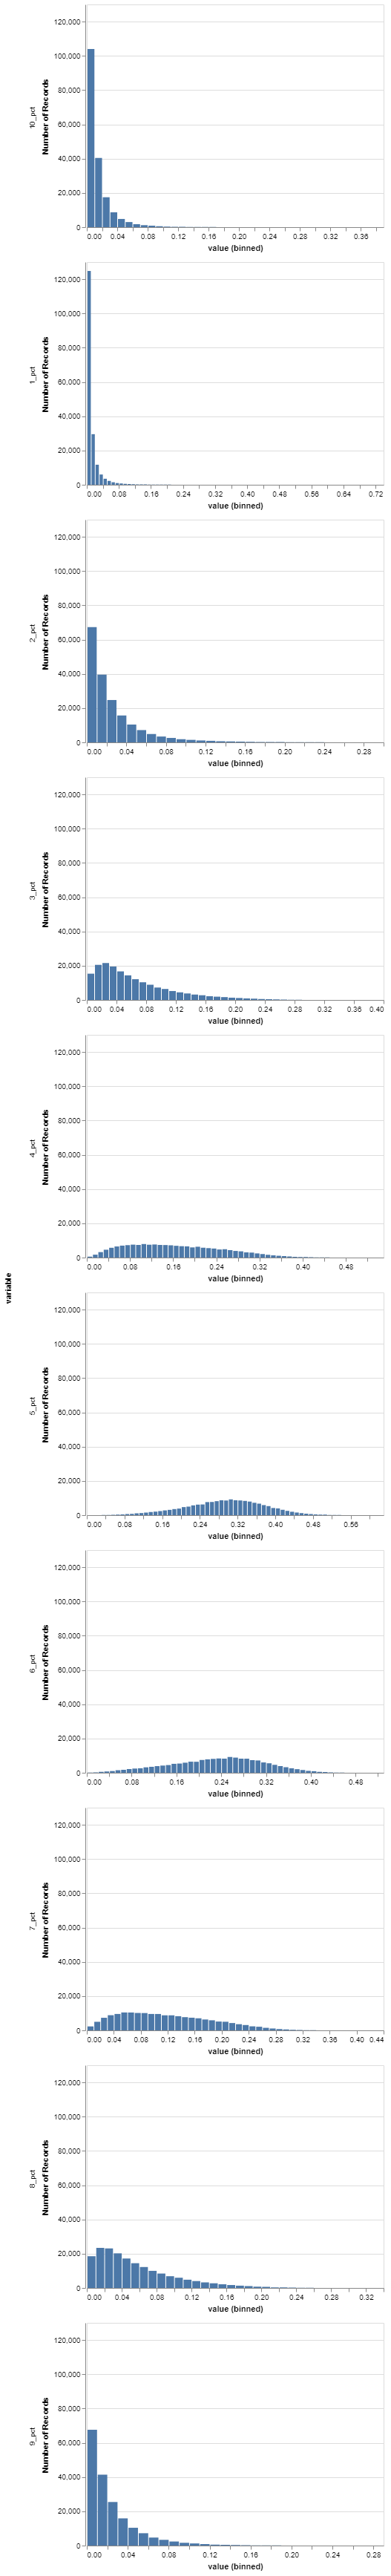

In [78]:
alt.Chart(melted_train).mark_bar().encode(
  x=alt.X('value:Q', bin=alt.Bin(maxbins=80)),
  y='count()'
).facet(row='variable').resolve_scale(x='independent')

In [79]:
# alt.Chart(melted_test).mark_bar().encode(
#   x=alt.X('value:Q', bin=alt.Bin(maxbins=80)),
#   y='count()'
# ).facet(row='variable').resolve_scale(x='independent')

In [80]:
train_df[['1_pct',
       '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct',
       '10_pct', 'rating.mean']].sort_values(by='rating.mean', ascending=False).head(3)

,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct,rating.mean
255507,0.000000,0.0,0.000000,0.000000,0.018182,0.045455,0.118182,0.254545,0.263636,0.300000,8.600000
255506,0.010989,0.0,0.000000,0.000000,0.000000,0.065934,0.120879,0.219780,0.263736,0.318681,8.571429
255505,0.000000,0.0,0.005814,0.005814,0.040698,0.063953,0.110465,0.180233,0.255814,0.337209,8.517442


In [81]:
train_df = train_df.rename(columns={'rating.mean': 'rating_mean'})
test_df = test_df.rename(columns={'rating.mean': 'rating_mean'})
validation_df = validation_df.rename(columns={'rating.mean': 'rating_mean'})

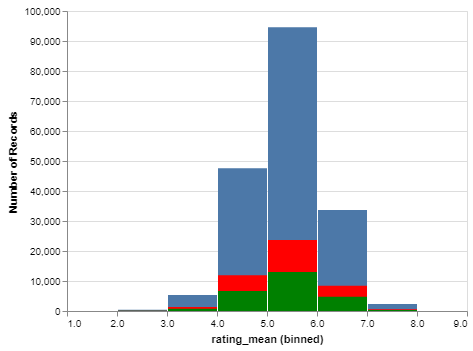

In [82]:
alt.Chart(train_df).mark_bar().encode(x=alt.X('rating_mean:Q', bin=True), y='count()') + alt.Chart(
    validation_df).mark_bar(color='red').encode(x=alt.X('rating_mean:Q', bin=True), y='count()')  + alt.Chart(test_df).mark_bar(
    color='green').encode(x=alt.X('rating_mean:Q', bin=True), y='count()')

In [83]:
# import numpy as np
# train_df.groupby('rating.mean.bucket').agg({'rating.mean.bucket':'count'})

In [84]:
#validation_df.groupby('rating.mean.bucket').agg({'rating.mean.bucket':'count'})

In [85]:
# test_df.groupby('rating.mean.bucket').agg({'rating.mean.bucket':'count'})

In [86]:
# from imblearn.under_sampling import CondensedNearestNeighbour, OneSidedSelection, EditedNearestNeighbours, AllKNN, NeighbourhoodCleaningRule
# enn = CondensedNearestNeighbour()


# X_resampled, y_resampled = enn.fit_resample(df[['image_id', 'rating_mean_bucket', 'rating_mean']], np.ravel(df[['rating_mean_bucket']]))
# df_undersampled = pd.DataFrame(X_resampled, columns=['image_id', 'rating_mean_bucket', 'rating_mean'])
# df_undersampled['rating_mean_bucket'].value_counts()

In [87]:
melted2 = pd.melt(df, id_vars=['image.id'], value_vars=['1_pct','2_pct','3_pct','4_pct','5_pct','6_pct','7_pct','8_pct','9_pct','10_pct'])

In [88]:
df.columns

Index(['image.id', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       'semantic.tag.id1', 'semantic.tag.id2', 'challenge.id', 'rating.mean',
       'rating.sd', 'rating.mean.bucket', 'aspect_ratio', 'depth', 'file_size',
       'height', 'img_size', 'width', 'resolution', 'num_rates', '1_pct',
       '2_pct', '3_pct', '4_pct', '5_pct', '6_pct', '7_pct', '8_pct', '9_pct',
       '10_pct'],
      dtype='object')

In [124]:
df_high = df[df['rating.mean'] >= 7] 
df_low = df[df['rating.mean'] <= 4]
df_medium = df[(df['rating.mean'] < 7) &(df['rating.mean'] > 4)] 
df_medium = df_medium.sample(n=5000, random_state=4)
len(df_medium)

df_reduced = df_medium.append(df_high.append(df_low, ignore_index=True), ignore_index=True)
len(df_reduced)

16391

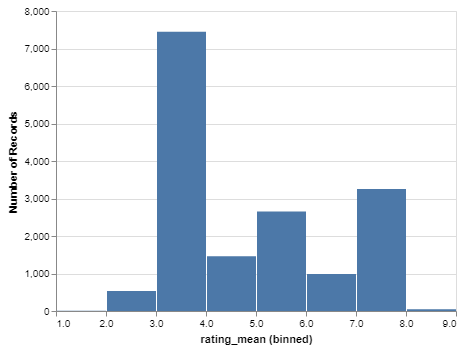

In [126]:
df_reduced.rename(columns={'rating.mean': 'rating_mean'}, inplace=True)
alt.Chart(df_reduced).mark_bar().encode(x=alt.X('rating_mean:Q', bin=True), y='count()')